In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
from dotenv import dotenv_values
from using_requests.mongodb_functions import *

In [3]:
uri = dotenv_values(".env")['MONGODB_URI']
client = MongoClient(uri)
database = client['Spotify']

In [4]:
collection = database['tracks_history']
collection.find_one()

{'_id': ObjectId('64939dc8bb07d225ffa6a7bb'),
 'ts': '2016-03-14T11:05:55Z',
 'username': '22pocvvzgjqmcfkku3qqd4e5q',
 'platform': 'Wine (1.9.4)',
 'ms_played': 244773,
 'conn_country': 'BR',
 'ip_addr_decrypted': '200.239.73.96',
 'user_agent_decrypted': 'unknown',
 'master_metadata_track_name': 'My Curse',
 'master_metadata_album_artist_name': 'Killswitch Engage',
 'master_metadata_album_album_name': 'As Daylight Dies',
 'spotify_track_uri': 'spotify:track:6zKF4293k44ItKWJJgrhXv',
 'episode_name': None,
 'episode_show_name': None,
 'spotify_episode_uri': None,
 'reason_start': 'clickrow',
 'reason_end': 'trackdone',
 'shuffle': False,
 'skipped': False,
 'offline': False,
 'offline_timestamp': 0,
 'incognito_mode': False}

## Tracks history

In [5]:
th = get_tracks_history(database)

In [6]:
df_th = pd.DataFrame(th)
df_th.sort_values(by='datetime_start_track', inplace=True)
df_th.reset_index(drop=True, inplace=True)
df_th.head()

,artist,album,track,spotify_track_uri,datetime_start_track,datetime_end_track,reason_start_track,reason_end_track,skipped,shuffle
0,Iron Maiden,The Book of Souls,If Eternity Should Fail,spotify:track:3n14UOwEsWw7W8iYj1mx1v,2016-03-11 19:04:26.360,2016-03-11 19:10:17,clickrow,endplay,True,False
1,Killswitch Engage,As Daylight Dies,My Curse,spotify:track:6zKF4293k44ItKWJJgrhXv,2016-03-11 19:10:19.440,2016-03-11 19:14:17,clickrow,endplay,True,False
2,In Flames,Clayman (Reissue 2014),Only for the Weak,spotify:track:03zYFtluA21jFWQVPMbUYO,2016-03-11 19:14:17.774,2016-03-11 19:19:13,clickrow,trackdone,False,False
3,Amon Amarth,Twilight Of The Thunder God,Twilight Of The Thunder God,spotify:track:5u3l2TONYacJgmRPQVaF9y,2016-03-11 19:19:14.317,2016-03-11 19:19:46,trackdone,endplay,True,False
4,Killswitch Engage,Incarnate,Strength of the Mind,spotify:track:6AjXt5W30GHH3pZPrYK6TH,2016-03-11 19:19:46.987,2016-03-11 19:23:33,clickrow,trackdone,False,False


In [7]:
df_th.shape

(44990, 10)

## Songs

In [8]:
songs = get_songs_from_history(database)

In [9]:
df_songs = pd.DataFrame(songs)
df_songs.head()

,artist,track,track_uri,track_id,count
0,Alice In Chains,Down In A Hole (2022 Remaster),spotify:track:7FRfYOql61DGDp9VPPe2qA,7FRfYOql61DGDp9VPPe2qA,220
1,Slipknot,Killpop,spotify:track:6AAZigYqOch79lKcrSBOv0,6AAZigYqOch79lKcrSBOv0,218
2,Deftones,My Own Summer (Shove It),spotify:track:1158ckiB5S4cpsdYHDB9IF,1158ckiB5S4cpsdYHDB9IF,204
3,Slayer,Disciple,spotify:track:2uenkeJMEfGmjebYnewnlE,2uenkeJMEfGmjebYnewnlE,172
4,Korn,Right Now,spotify:track:19fYhk0wzXqUOoBqkPsYCP,19fYhk0wzXqUOoBqkPsYCP,153


In [10]:
df_songs.shape

(8772, 5)

## Artists

In [11]:
artists = get_artists_from_history(database)

In [12]:
df_artists = pd.DataFrame(artists)
df_artists.head()

,artist,count
0,Korn,4066
1,Slipknot,3525
2,Alice In Chains,2845
3,Killswitch Engage,1907
4,Deftones,1860


## Minutes per day

In [13]:
minutes_per_day = get_minutes_per_day(database)

In [14]:
df_minutes_per_day = pd.DataFrame(minutes_per_day)
df_minutes_per_day.head()

,datetime_track,weekday,total_minutes
0,2016-03-11,6,34.3
1,2016-03-14,2,34.8
2,2016-03-15,3,170.1
3,2016-03-16,4,6.7
4,2016-03-22,3,22.9


In [35]:
df2 = df_minutes_per_day[['weekday', 'total_minutes']].groupby('weekday').sum().copy()
df2.reset_index(inplace=True)
weekday_dict = {1:'Domingo', 2:'Segunda', 3:'Terça', 4:'Quarta', 5:'Quinta', 6:'Sexta', 7:'Sábado'}
weekday_name = lambda x : weekday_dict[x]
df2['weekday_name'] = df2['weekday'].apply(weekday_name)
df2.head(7)

,weekday,total_minutes,weekday_name
0,1,7355.6,Domingo
1,2,17967.9,Segunda
2,3,20263.7,Terça
3,4,19877.8,Quarta
4,5,23198.2,Quinta
5,6,21126.3,Sexta
6,7,13489.7,Sábado


<Axes: title={'center': 'Total minutes per weekday'}, xlabel='weekday_name'>

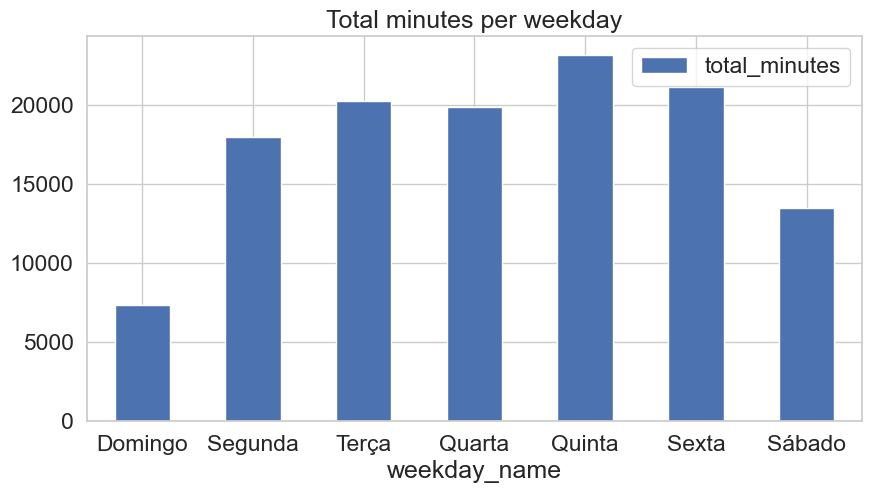

In [36]:
df2.plot.bar(x='weekday_name', y='total_minutes', rot=0, figsize=(10,5), title='Total minutes per weekday')

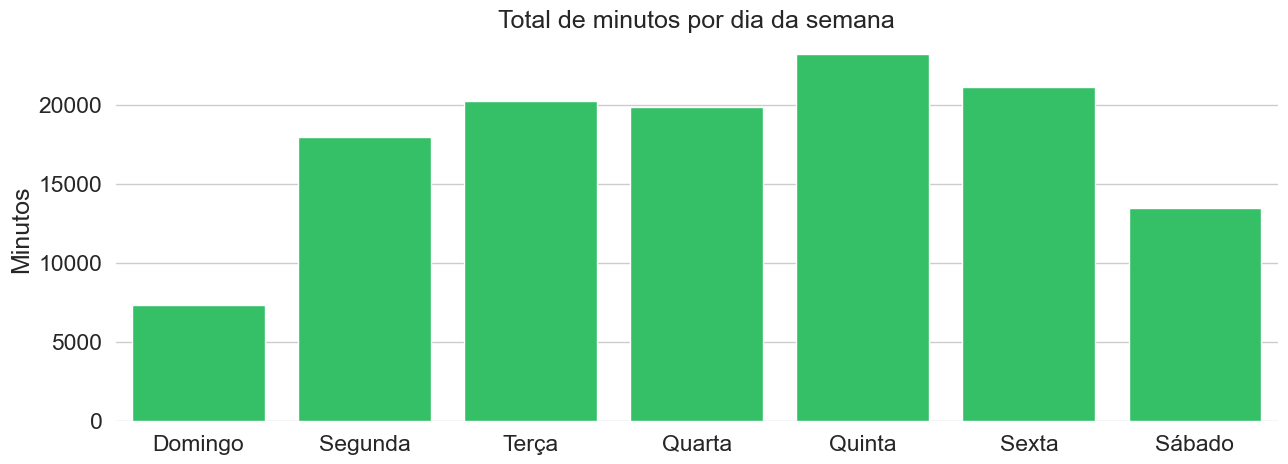

In [45]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid", font_scale=1.5)
sns.barplot(x='weekday_name', y='total_minutes', data=df2, color='#1ed760')
sns.despine(left=True, bottom=True)
plt.title('Total de minutos por dia da semana')
plt.xlabel('')
plt.ylabel('Minutos')
plt.show()

## Minutes per hour

In [18]:
minutes_per_hour = get_minutes_per_hour(database)

In [19]:
df_minutes_per_hour = pd.DataFrame(minutes_per_hour)
df_minutes_per_hour.head()

,datetime_track,total_minutes
0,2016-03-11 19:00:00,31.9
1,2016-03-11 20:00:00,2.4
2,2016-03-14 11:00:00,29.4
3,2016-03-14 15:00:00,5.4
4,2016-03-15 15:00:00,8.5
